In [385]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [386]:
df = pd.read_csv('Customer-Churn-Records.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


Here `exited` is the target column

# EDA

In [387]:
unnecessary_cols = ['RowNumber', 'CustomerId', 'Surname']

df = df.drop(df[unnecessary_cols], axis=1)

# Categorical Treatment

In [388]:
# Understanding categorical values
for i in df:
    if df[i].dtypes == object:
        print(i)
        print(df[i].value_counts())

Geography
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
Gender
Male      5457
Female    4543
Name: Gender, dtype: int64
Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: Card Type, dtype: int64


In [389]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [390]:
df['Geography'] = le.fit_transform(df['Geography'])
for i,j in enumerate (le.classes_):
    print(i, j)

0 France
1 Germany
2 Spain


In [391]:
df['Gender'] = le.fit_transform(df['Gender'])
for i,j in enumerate (le.classes_):
    print(i, j)

0 Female
1 Male


In [392]:
df['Card Type'] = le.fit_transform(df['Card Type'])
for i,j in enumerate (le.classes_):
    print(i, j)

0 DIAMOND
1 GOLD
2 PLATINUM
3 SILVER


In [393]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,1,2,0,464
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,1,3,0,456
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,1,3,0,377
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,0,5,1,350
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,0,5,1,425


In [394]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  int32  
 2   Gender              10000 non-null  int32  
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  int32  
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int32(3), int64(10)
memory usage: 1.0 M

In [395]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Card Type',
       'Point Earned'],
      dtype='object')

# Null checking

In [396]:
df.isna().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [397]:
df.duplicated().sum()

0

<AxesSubplot: xlabel='Age', ylabel='EstimatedSalary'>

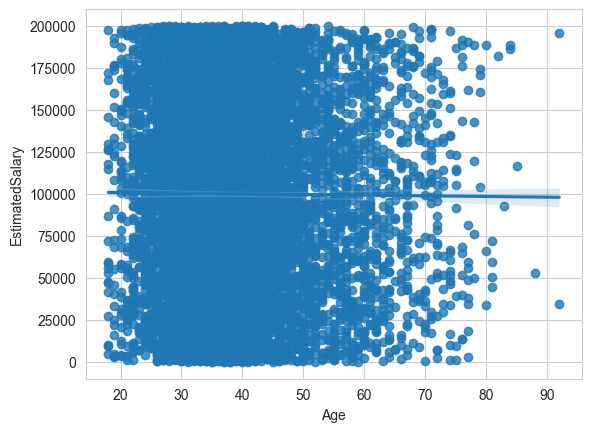

In [398]:
sns.regplot(data=df, x='Age', y='EstimatedSalary')

<AxesSubplot: xlabel='Age', ylabel='Balance'>

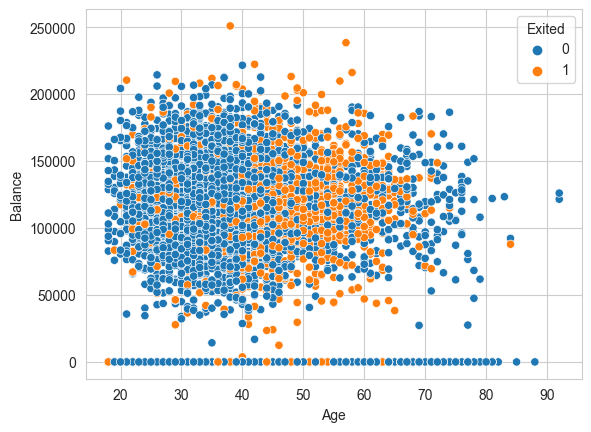

In [399]:
sns.scatterplot(data=df, x='Age', y='Balance', hue='Exited')

### There are zero values in `Balance`. Which is not ideal. This is called Sparse Column.
We have to treat these misvalues.

In [400]:
zeros = (df['Balance'] == 0)

df[zeros].sort_values(by='Age')

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
3512,806,2,1,18,3,0.0,2,1,1,86994.54,0,0,2,1,768
8522,644,2,1,18,8,0.0,2,1,0,59172.42,0,0,4,0,975
3330,738,0,1,18,4,0.0,2,1,1,47799.15,0,0,5,2,739
9572,644,2,1,18,7,0.0,1,0,1,59645.24,1,1,1,1,620
3517,771,2,1,18,1,0.0,2,0,0,41542.95,0,0,1,1,371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7526,850,0,0,81,1,0.0,2,1,1,59568.24,0,0,3,1,886
9080,711,0,0,81,6,0.0,2,1,1,72276.24,0,0,4,3,774
766,700,0,0,82,2,0.0,2,0,1,182055.36,0,0,2,1,603
3033,787,0,0,85,10,0.0,2,1,1,116537.96,0,0,2,1,542


In [401]:
df[zeros]['Exited'].value_counts()

0    3117
1     500
Name: Exited, dtype: int64

It is evident that, the account balance of zero values, leaving the bank makes up `1/4th` of the total exiter.
So this makes an impact.

In [402]:
df['Balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

In [403]:
# Replacing the zeros with an arbitrary value (25000)

df['Balance'] = df['Balance'].replace(to_replace=0, value=25000)

<AxesSubplot: xlabel='Age', ylabel='Balance'>

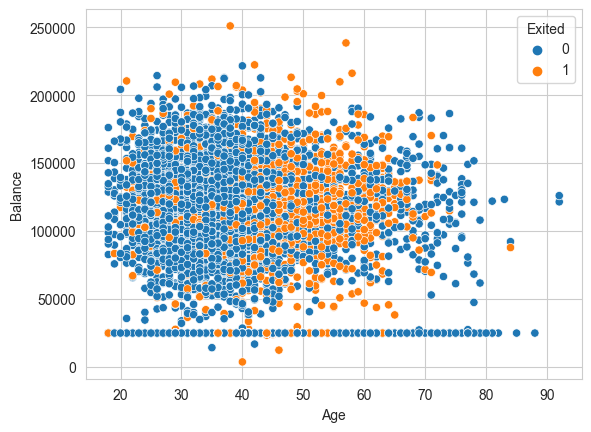

In [404]:
sns.scatterplot(data=df, x='Age', y='Balance', hue='Exited')

<AxesSubplot: xlabel='Age', ylabel='Point Earned'>

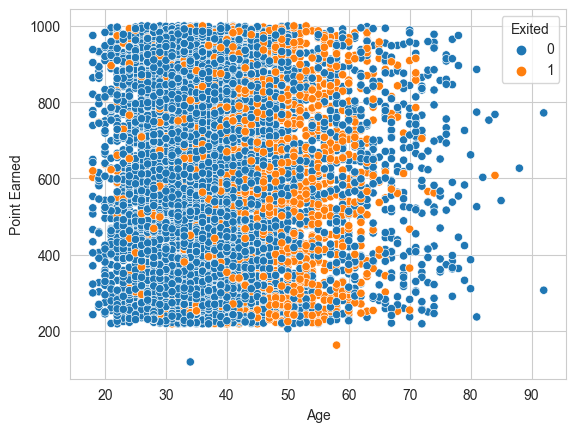

In [405]:
sns.scatterplot(data=df, y ='Point Earned', x = 'Age', hue='Exited')

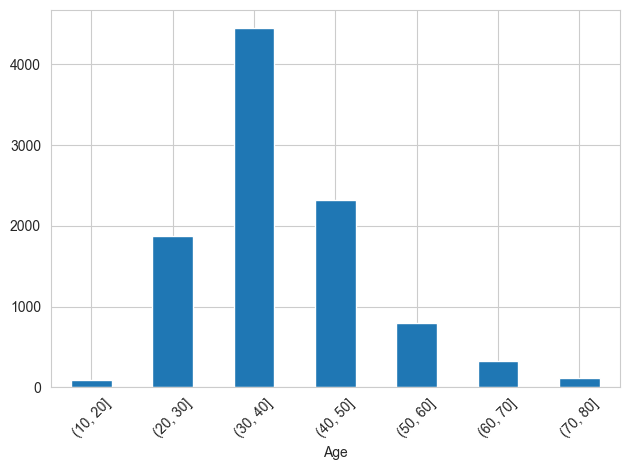

In [406]:
bins = list(np.arange(10,90,10))
df_age = df.groupby(pd.cut(df['Age'], bins=bins)).Age.count()
df_age.plot(kind='bar')
plt.xticks(rotation=45, ha='center')
plt.tight_layout()
plt.show()

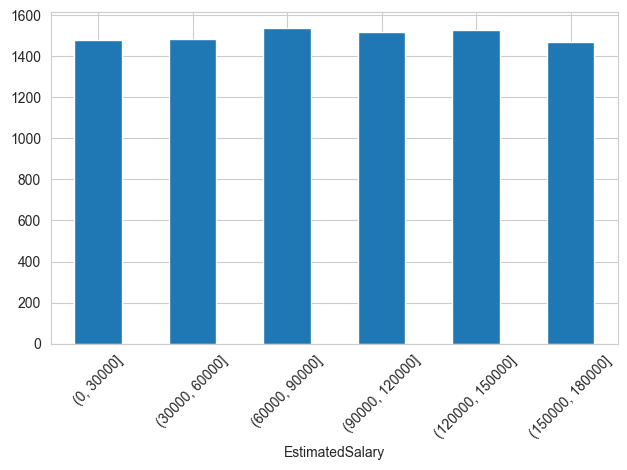

In [407]:
bins = list(np.arange(0,200000,30000))
df_salary = df.groupby(pd.cut(df['EstimatedSalary'], bins=bins)).EstimatedSalary.count()
df_salary.plot(kind='bar')
plt.xticks(rotation=45, ha='center')
plt.tight_layout()
plt.show()

# Imbalance Checking

0    7962
1    2038
Name: Exited, dtype: int64


<AxesSubplot: >

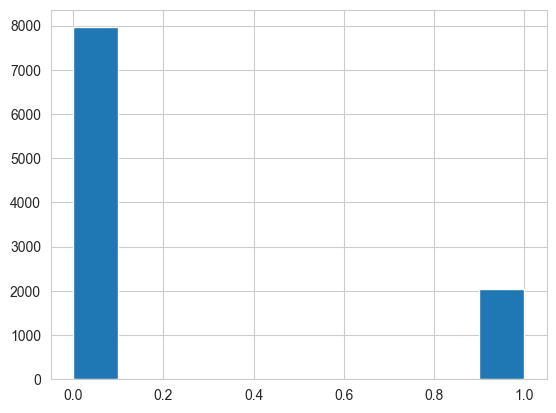

In [408]:
print(df['Exited'].value_counts())
df['Exited'].hist()

So the dataset is imbalanced by a lot.

## Treating Imbalance

In [409]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [410]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

X,y = smote.fit_resample(X,y)

In [411]:
X.shape, y.shape

((15924, 14), (15924,))

In [412]:
print(y.value_counts())

1    7962
0    7962
Name: Exited, dtype: int64


<AxesSubplot: >

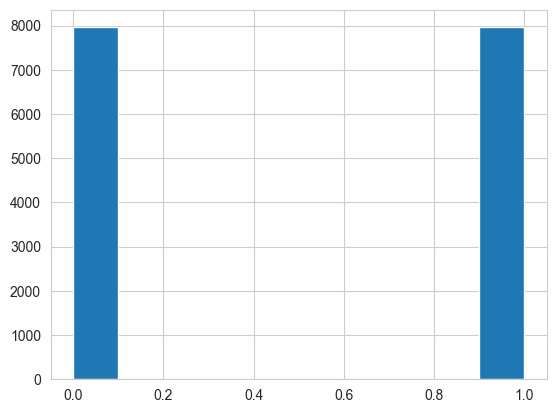

In [413]:
y.hist()

In [414]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=.70, random_state=42)
X_train.shape, y_test.shape

((11146, 14), (4778,))

# Machine Learning

In [415]:
from sklearn.metrics import classification_report, confusion_matrix
def print_metrics(model, X_train=X_train,y_train = y_train, X_test = X_test, y_test = y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))
    return (sns.heatmap(confusion_matrix(y_test,y_pred), annot=True))

# Logistic Regression

              precision    recall  f1-score   support

           0       0.69      0.64      0.67      2463
           1       0.65      0.70      0.67      2315

    accuracy                           0.67      4778
   macro avg       0.67      0.67      0.67      4778
weighted avg       0.67      0.67      0.67      4778


<AxesSubplot: >

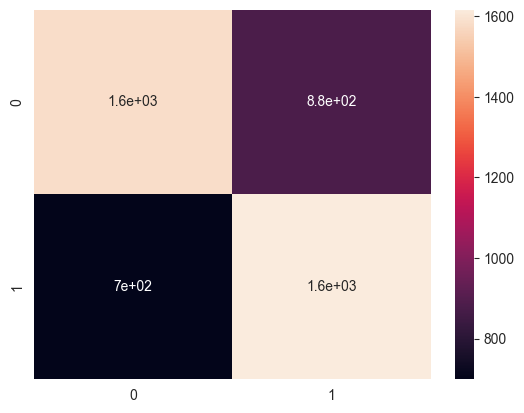

In [416]:
from sklearn.linear_model import LogisticRegression
print_metrics(LogisticRegression())

# Decision Tree Classifier

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2463
           1       0.99      1.00      1.00      2315

    accuracy                           1.00      4778
   macro avg       1.00      1.00      1.00      4778
weighted avg       1.00      1.00      1.00      4778


<AxesSubplot: >

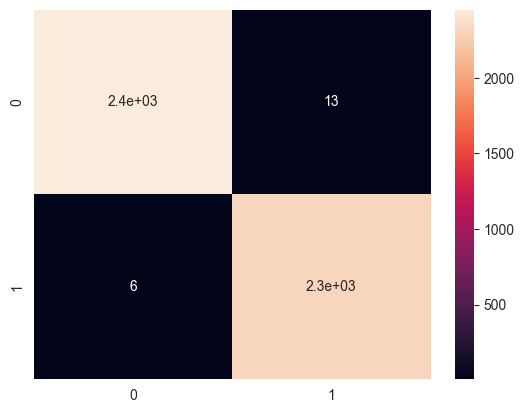

In [417]:
from sklearn.tree import DecisionTreeClassifier
print_metrics(DecisionTreeClassifier())

# XGBoost

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2463
           1       1.00      1.00      1.00      2315

    accuracy                           1.00      4778
   macro avg       1.00      1.00      1.00      4778
weighted avg       1.00      1.00      1.00      4778


<AxesSubplot: >

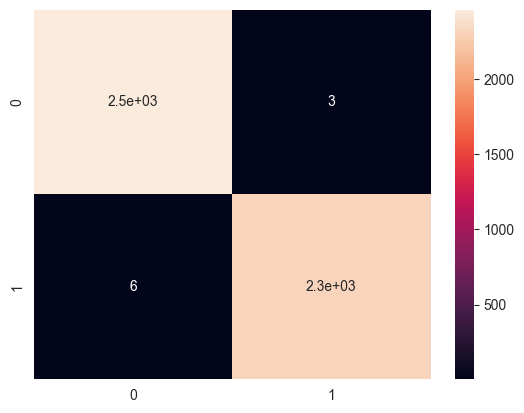

In [418]:
from xgboost import XGBClassifier
print_metrics(XGBClassifier())

# Catboost

Learning rate set to 0.028844
0:	learn: 0.6091597	total: 5.75ms	remaining: 5.74s
999:	learn: 0.0014339	total: 4.96s	remaining: 0us
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2463
           1       1.00      1.00      1.00      2315

    accuracy                           1.00      4778
   macro avg       1.00      1.00      1.00      4778
weighted avg       1.00      1.00      1.00      4778


<AxesSubplot: >

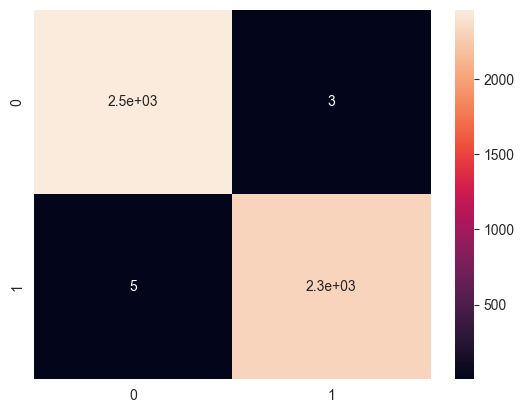

In [419]:
from catboost import CatBoostClassifier
print_metrics(CatBoostClassifier(verbose=1000))

# Random Forest

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2463
           1       1.00      1.00      1.00      2315

    accuracy                           1.00      4778
   macro avg       1.00      1.00      1.00      4778
weighted avg       1.00      1.00      1.00      4778


<AxesSubplot: >

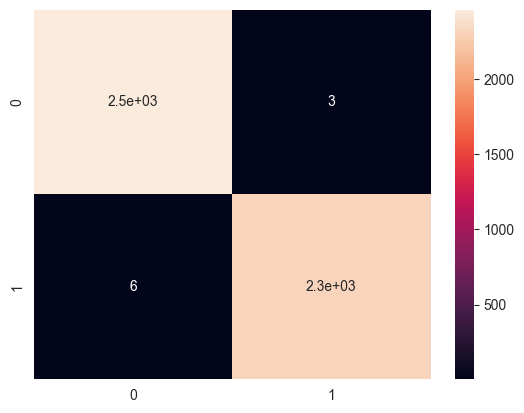

In [420]:
from sklearn.ensemble import RandomForestClassifier
print_metrics(RandomForestClassifier())

# Verdict
### Tree based and Boosting algorithms tend to perform exceptionally in this sort of binary classification.